Language Translation
--
Testing the Google Maps API in Python.

First we will simply import the GCP Translate library and translate "Hello World!" from english to spanish.

In [5]:
# Imports the Google Cloud client library
from google.cloud import translate

# Instantiates a client
translate_client = translate.Client()

# The text to translate
text = u'Hello, world!'
# The target language
target = 'es'

# Translates some text into Russian
translation = translate_client.translate(
    text,
    target_language=target)

print(u'Text: {}'.format(text))
print(u'Translation: {}'.format(translation['translatedText']))

Text: Hello, world!
Translation: ¡Hola Mundo!


That was pretty simple. So if creating our own model proves to be too difficult, we can definitely substitute it for the Google Translate API.



In [6]:
"""Synthesizes speech from the input string of text or ssml.

Note: ssml must be well-formed according to:
    https://www.w3.org/TR/speech-synthesis/
"""
from google.cloud import texttospeech

# Instantiates a client
client = texttospeech.TextToSpeechClient()

# Set the text input to be synthesized
synthesis_input = texttospeech.types.SynthesisInput(text=translation['translatedText'])

# Build the voice request, select the language code ("en-US") and the ssml
# voice gender ("neutral")
voice = texttospeech.types.VoiceSelectionParams(
    language_code='es',
    ssml_gender=texttospeech.enums.SsmlVoiceGender.NEUTRAL)

# Select the type of audio file you want returned
audio_config = texttospeech.types.AudioConfig(
    audio_encoding=texttospeech.enums.AudioEncoding.MP3)

# Perform the text-to-speech request on the text input with the selected
# voice parameters and audio file type
response = client.synthesize_speech(synthesis_input, voice, audio_config)

# The response's audio_content is binary.
with open('output.mp3', 'wb') as out:
    # Write the response to the output file.
    out.write(response.audio_content)
    print('Audio content written to file "output.mp3"')

Audio content written to file "output.mp3"


In [7]:
import librosa
x, sr = librosa.load('output.mp3')

In [8]:
print(x.shape)
print(sr)

(28048,)
22050


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

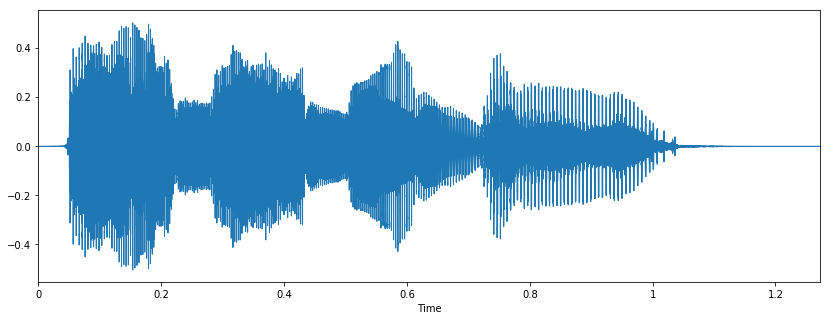

In [10]:
plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sr)

In [17]:
import IPython.display as ipd
ipd.Audio('output.mp3')